Importation de pandas

In [16]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Lecture du fichier CSV

In [7]:
df = pd.read_csv("nombre-total-de-points-de-charge.csv", sep=';')

Obtenir le nombre de lignes et de colonnes

In [8]:
nb_lignes, nb_colonnes = df.shape
print("Nombre de lignes :", nb_lignes)
print("Nombre de colonnes :", nb_colonnes)

Nombre de lignes : 40
Nombre de colonnes : 4


Afficher les noms des colonnes (en-tête)

In [9]:
print("En-tête du fichier :")
print(df.columns.tolist())

En-tête du fichier :
['Trimestre', 'Ouvert au public', 'Particulier', 'Société']


Affichage des 10 premières lignes

In [15]:
print("10 premières lignes du fichier :")
print(tabulate(df.head(10), headers='keys', tablefmt='fancy_grid'))

10 premières lignes du fichier :
╒════╤═════════════╤════════════════════╤═══════════════╤═══════════╕
│    │ Trimestre   │   Ouvert au public │   Particulier │   Société │
╞════╪═════════════╪════════════════════╪═══════════════╪═══════════╡
│  0 │ 2024 T4     │             154694 │       1297922 │    895880 │
├────┼─────────────┼────────────────────┼───────────────┼───────────┤
│  1 │ 2023 T3     │             109856 │        906728 │    652061 │
├────┼─────────────┼────────────────────┼───────────────┼───────────┤
│  2 │ 2022 T1     │              57732 │        516993 │    392302 │
├────┼─────────────┼────────────────────┼───────────────┼───────────┤
│  3 │ 2021 T2     │              43699 │        360684 │    307136 │
├────┼─────────────┼────────────────────┼───────────────┼───────────┤
│  4 │ 2020 T2     │              32648 │        193791 │    180431 │
├────┼─────────────┼────────────────────┼───────────────┼───────────┤
│  5 │ 2020 T1     │              31081 │        173740 │

In [17]:
# Nettoyage des colonnes numériques
for col in ['Ouvert au public', 'Particulier', 'Société']:
    df[col] = df[col].astype(str).str.replace(r'\s+', '', regex=True).astype(int)

In [ ]:
# Convertir "Trimestre" en valeur numérique (ex: 2024 T4 → 2024.75)
def trimestre_to_float(trimestre_str):
    year, quarter = trimestre_str.split(' ')
    year = int(year)
    quarter_val = {"T1": 0.0, "T2": 0.25, "T3": 0.5, "T4": 0.75}[quarter]
    return year + quarter_val

df['Annee'] = df['Trimestre'].apply(trimestre_to_float)

In [19]:
# Séparer X et y
X = df[['Annee']]
y_ouvert = df['Ouvert au public']
y_particulier = df['Particulier']
y_societe = df['Société']

In [20]:
# Créer et entraîner les modèles
model_ouvert = LinearRegression().fit(X, y_ouvert)
model_particulier = LinearRegression().fit(X, y_particulier)
model_societe = LinearRegression().fit(X, y_societe)

In [21]:
# Trimestres de 2025
trimestres_2025 = np.array([2025.0, 2025.25, 2025.5, 2025.75]).reshape(-1, 1)

In [22]:
# Prédictions
pred_ouvert = model_ouvert.predict(trimestres_2025)
pred_particulier = model_particulier.predict(trimestres_2025)
pred_societe = model_societe.predict(trimestres_2025)

/home/chadnel-linux/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/chadnel-linux/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/chadnel-linux/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
# Créer un DataFrame pour les résultats
predictions_2025 = pd.DataFrame({
    'Trimestre': ['2025 T1', '2025 T2', '2025 T3', '2025 T4'],
    'Ouvert au public': pred_ouvert.astype(int),
    'Particulier': pred_particulier.astype(int),
    'Société': pred_societe.astype(int)
})
print("📊 Prédictions pour l’année 2025 :")
print(predictions_2025)

📊 Prédictions pour l’année 2025 :
  Trimestre  Ouvert au public  Particulier  Société
0   2025 T1            116372       983637   701758
1   2025 T2            119640      1013777   722413
2   2025 T3            122908      1043918   743068
3   2025 T4            126176      1074058   763722


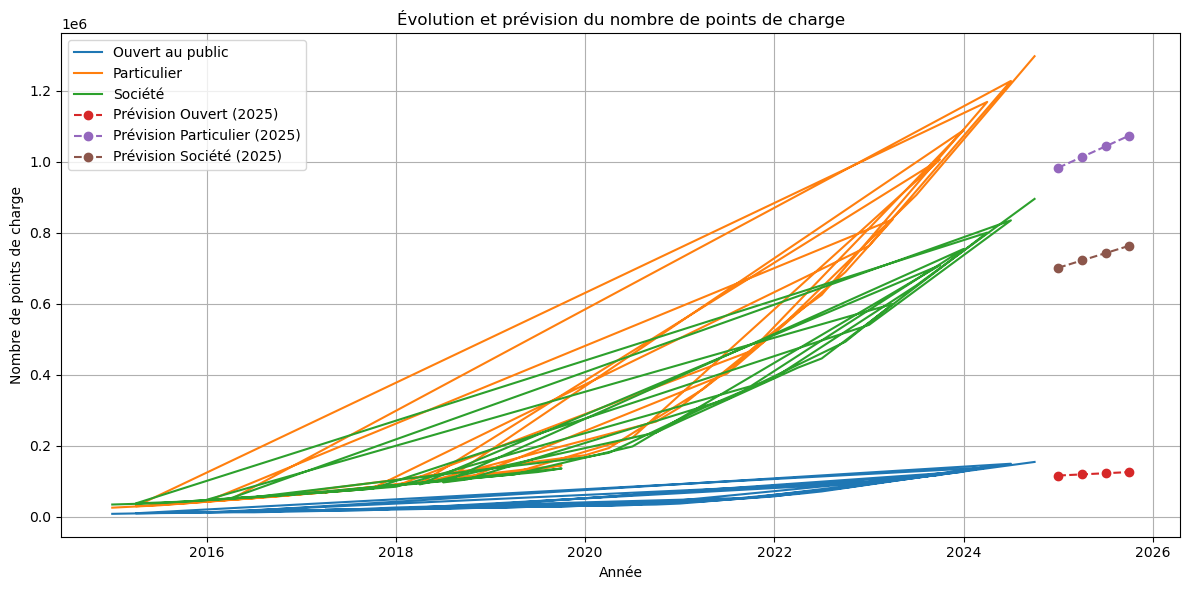

In [24]:
# Tracer les courbes + prédictions
plt.figure(figsize=(12, 6))
plt.plot(df['Annee'], y_ouvert, label='Ouvert au public')
plt.plot(df['Annee'], y_particulier, label='Particulier')
plt.plot(df['Annee'], y_societe, label='Société')

plt.plot(trimestres_2025, pred_ouvert, 'o--', label='Prévision Ouvert (2025)')
plt.plot(trimestres_2025, pred_particulier, 'o--', label='Prévision Particulier (2025)')
plt.plot(trimestres_2025, pred_societe, 'o--', label='Prévision Société (2025)')

plt.title("Évolution et prévision du nombre de points de charge")
plt.xlabel("Année")
plt.ylabel("Nombre de points de charge")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()